In [1]:
#PART 1  My question is is there any relationship between home wins and away wins counts.

In [2]:
# First I am declaring modules which I will use.
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import thinkstats2 as ts
import thinkplot as tp

In [3]:
# Second I am reading basketvall_csv 
teams = pd.read_csv('basketball_teams.csv')


In [4]:
#PART 2 Now I will show my colums which I am using.
print(teams.columns)


Index([u'year', u'lgID', u'tmID', u'franchID', u'confID', u'divID', u'rank',
       u'confRank', u'playoff', u'name', u'o_fgm', u'o_fga', u'o_ftm',
       u'o_fta', u'o_3pm', u'o_3pa', u'o_oreb', u'o_dreb', u'o_reb', u'o_asts',
       u'o_pf', u'o_stl', u'o_to', u'o_blk', u'o_pts', u'd_fgm', u'd_fga',
       u'd_ftm', u'd_fta', u'd_3pm', u'd_3pa', u'd_oreb', u'd_dreb', u'd_reb',
       u'd_asts', u'd_pf', u'd_stl', u'd_to', u'd_blk', u'd_pts',
       u'o_tmRebound', u'd_tmRebound', u'homeWon', u'homeLost', u'awayWon',
       u'awayLost', u'neutWon', u'neutLoss', u'confWon', u'confLoss',
       u'divWon', u'divLoss', u'pace', u'won', u'lost', u'games', u'min',
       u'arena', u'attendance', u'bbtmID'],
      dtype='object')


In [5]:
#These are my table which im using
teams


,year,lgID,tmID,franchID,confID,divID,rank,confRank,playoff,name,...,divWon,divLoss,pace,won,lost,games,min,arena,attendance,bbtmID
0,1946,NBA,BOS,BOS,NaN,ED,5,0,NaN,Boston Celtics,...,11,19,0,22,38,60,14500.0,Boston Garden,32767,BOS
1,1946,NBA,CHS,CHS,NaN,WD,1,0,F,Chicago Stags,...,17,8,0,39,22,61,14840.0,Chicago Stadium,0,CHS
2,1946,NBA,CLR,CLR,NaN,WD,3,0,R1,Cleveland Rebels,...,10,14,0,30,30,60,14600.0,Cleveland Arena,0,CLR
3,1946,NBA,DTF,DTF,NaN,WD,4,0,NaN,Detroit Falcons,...,8,16,0,20,40,60,14600.0,Detroit Olympia,0,DTF
4,1946,NBA,NYK,NYK,NaN,ED,3,0,SF,New York Knicks,...,13,17,0,33,27,60,14575.0,Madison Square Garden (III),32767,NYK
5,1946,NBA,PHW,GSW,NaN,ED,2,0,NC,Philadelphia Warriors,...,19,11,0,35,25,60,14575.0,Philadelphia Arena,32767,PHW
6,1946,NBA,PIT,PIT,NaN,WD,5,0,NaN,Pittsburgh Ironmen,...,6,18,0,15,45,60,14600.0,Duquesne Gardens,0,PTI
7,1946,NBA,PRO,PRO,NaN,ED,4,0,NaN,Providence Steamrollers,...,12,18,0,28,32,60,14600.0,Rhode Island Auditorium,0,PRO
8,1946,NBA,STB,STB,NaN,WD,2,0,R1,St. Louis Bombers,...,20,5,0,38,23,61,14840.0,St. Louis Arena,0,STB
9,1946,NBA,TRH,TRH,NaN,ED,5,0,NaN,Toronto Huskies,...,10,20,0,22,38,60,14600.0,Maple Leaf Gardens,0,TRH


In [6]:
#Ok now for the make my queries more easier i show my datas(yearId, tmId,homeWon,awayWon)
wons=teams[['year','tmID','homeWon','awayWon']]
wons

,year,tmID,homeWon,awayWon
0,1946,BOS,14,8
1,1946,CHS,22,17
2,1946,CLR,17,13
3,1946,DTF,12,8
4,1946,NYK,18,15
5,1946,PHW,23,12
6,1946,PIT,11,4
7,1946,PRO,19,9
8,1946,STB,22,16
9,1946,TRH,15,7


In [7]:
teams = teams.set_index(['year', 'tmID'])

In [8]:
# PART 3 Okey now for the plot my data I am writing a function which return histogram,cdf and pmf that using thinkstats functions.
# This function taking two parameters first is my dataset called teams and second is year which I can make queries according to years. 
def plotTeamByYear(teams,year):
    hist = {}
    # I am making query which according to year.
    teams_year = teams.xs(year) 
    # Now I am using for loop and make histogram each basketball club. so according to my histogram key Home way rating and value is away win that clubnd make histogram each baseball club. so according to my histogram key is Win rate and value is total salary that club
    for i in teams_year.index:
        hist[teams_year['homeWon'][i]]=  teams_year['awayWon'][i]
    # I am assign hist to my thinkstats histogram function.
    hist = ts.Hist(hist)
    # Now I am assign cdfTeams my histogram converting Cdf
    cdfTeams = ts.Cdf(hist,label=year) 
    # Same thing for the Pmf
    pmfTeams = ts.Pmf(hist,label=year)
    # Finally I am returning my histogram, cdf, and pmf.
    return hist,cdfTeams,pmfTeams

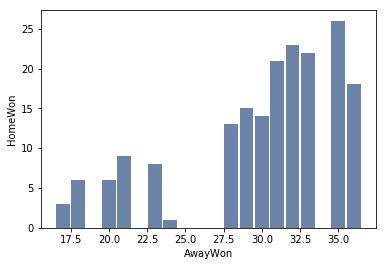

In [9]:
# Ok well let show some plot,
hist,plotCdf,plotPmf = plotTeamByYear(teams,1990L)
# First I am plotthing that data according to 1990 and show Histogram.
tp.Hist(hist)
tp.Show(xlabel='AwayWon', ylabel='HomeWon')

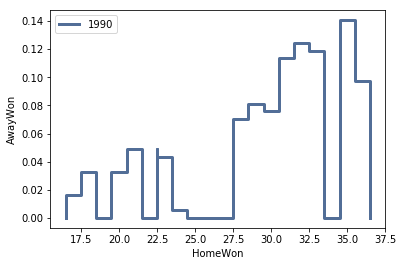

In [10]:
# Here I am Plottıng pmf
tp.Pmf(plotPmf)
tp.Show(xlabel='HomeWon', ylabel='AwayWon')

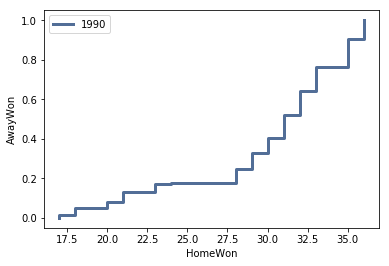

In [11]:
# And fınally cdf
tp.Cdf(plotCdf)
tp.Show(xlabel='HomeWon', ylabel='AwayWon')

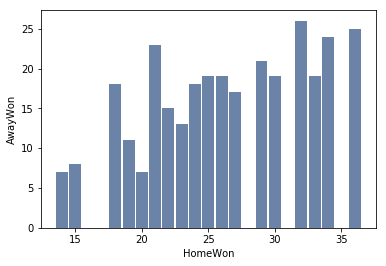

In [12]:
# Okay now I am doing same thing for the year 2001
hist,plotCdf,plotPmf = plotTeamByYear(teams,2001)
tp.Hist(hist)
tp.Show(xlabel='HomeWon', ylabel='AwayWon')

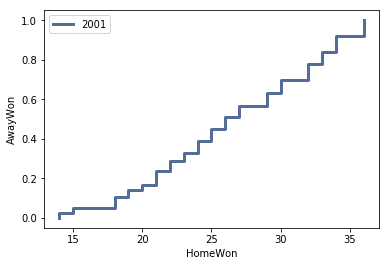

In [13]:
tp.Cdf(plotCdf)
tp.Show(xlabel="HomeWon", ylabel='AwayWon')

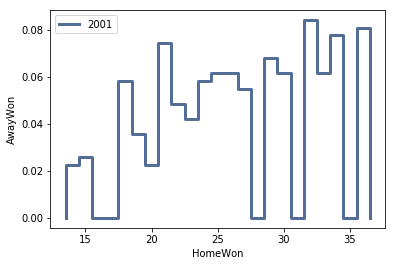

In [14]:
tp.Pmf(plotPmf)
tp.Show(xlabel='HomeWon', ylabel='AwayWon')

In [15]:
# Now for the seeing different to that data I am finally adding to 2013 data.
hist,plotCdf,plotPmf = plotTeamByYear(teams,2010)
tp.Hist(hist)
tp.Show(xlabel='HomwWon', ylabel='AwayWon')

thinkstats2.py:995: RuntimeWarning: invalid value encountered in true_divide
  self.ps /= self.ps[-1]


ValueError: Normalize: total probability is zero.

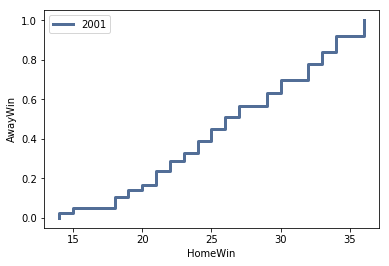

In [16]:
tp.Cdf(plotCdf)
tp.Show(xlabel='HomeWin', ylabel='AwayWin')

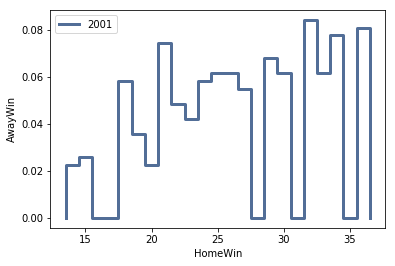

In [17]:
tp.Pmf(plotPmf)
tp.Show(xlabel='HomeWin', ylabel='AwayWin')

In [18]:
'5 descriptive statistic of homewin: standart deviation: ' + str(teams['homeWon'].std()) + ', mean: ' + str(teams['homeWon'].mean()) + ', median: ' +str(teams['homeWon'].median())+', min: '+str(teams['homeWon'].min())+', max: '+str(teams['homeWon'].max())

'5 descriptive statistic of homewin: standart deviation: 9.84632615197, mean: 21.361328125, median: 23.0, min: 0, max: 40'

In [19]:
'5 descriptive statistic of awayWon: standart deviation: ' + str(teams['awayWon'].std()) + ', mean: ' + str(teams['awayWon'].mean()) + ', median: ' +str(teams['awayWon'].median())+', min: '+str(teams['awayWon'].min())+', max: '+str(teams['awayWon'].max())

'5 descriptive statistic of awayWon: standart deviation: 7.44603276308, mean: 12.609375, median: 12.0, min: 0, max: 33'

In [20]:
# PART 4 I thought exponential distributions is good for the that case because I want to make quoteion from books. "In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called interarrival times." so for the observing events(homewon rate) and awaywon change in the year is the best distrubiton.

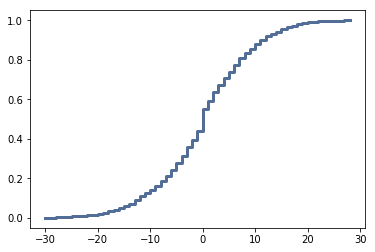

In [21]:
# First of all I will take a diffrences Win rate and salary in time interval and showing it Cdf plot for the make that I will use diff() function
diffswon = teams.homeWon.diff()
cdf = ts.Cdf(diffswon)
tp.Cdf(cdf)
tp.Show()

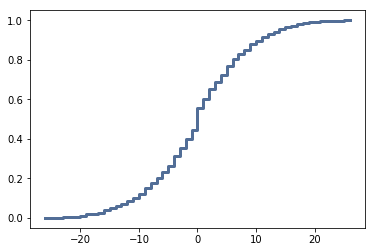

In [22]:
# And now you will see the awaywon rate
diffsawaywon = teams.awayWon.diff()
cdf = ts.Cdf(diffsawaywon)
tp.Cdf(cdf)
tp.Show()

In [23]:
import nsfg
import thinkstats2 as ts
def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = ts.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='weights')

In [24]:
MakeNormalPlot(teams["homeWon"])
thinkplot.Config(title='Teams number of home winnings, normal plot', xlabel='wins',
                 ylabel='CDF', loc='upper left')

NameError: global name 'thinkstats2' is not defined

In [25]:
# PART 5 So for that part I guess I did this part in part two because I did built one relationship in totalhomewon-Total awaywon and showed in one plotting.


In [26]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [27]:
Cov(teams['homeWon'], teams["awayWon"])

60.768096923828125

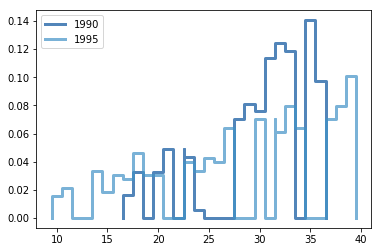

In [97]:
# PART 6 So for testing my claim first of all I am decided compare my data in year between 1990,1995 and 2000 So in Pmf I can show my hpothesis
# So first of all I am used my previous my function named plotTeamByYear
first_hist,first_Cdf,first_Pmf = plotTeamByYear(teams,1990)
second_hist,second_Cdf,second_Pmf = plotTeamByYear(teams,1995)
third_hist,third_Cdf,third_Pmf = plotTeamByYear(teams,2000)

# So finally I am plotting 1997 and 2003 data in Pmf form..
tp.PrePlot(2)
tp.Pmfs([first_Pmf,second_Pmf])
tp.Show()

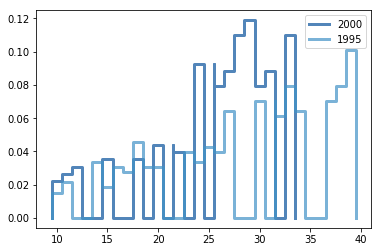

In [98]:
# And now I am comparing my data in 1995 and 2000.
tp.PrePlot(2)
tp.Pmfs([third_Pmf,second_Pmf])
tp.Show()

In [28]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [29]:
inter, slope = LeastSquares(teams["homeWon"],teams["awayWon"] )
inter, slope

(-0.78857300617666048, 0.62720575835809178)

In [99]:
#PART 7
# So finally i can say that wonn is not eqauls to happines because for example in 2000 some teams which home won more away won the less.
# So, Home won and Away won can different.